In [71]:
import pandas as pd

# Load the dataset (change the path to where your file is)
df = pd.read_csv("netflix_titles_with_IMDB.csv")

# Preview the data
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB_numvotes,IMDB_rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7117.0,7.4
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",4506.0,6.8
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,4310.0,7.2
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",287.0,6.6
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,78449.0,9.0


In [73]:
# Create a success label
df['success'] = df['IMDB_rating'].apply(lambda x: 1 if x > 7.5 else 0)


In [75]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB_numvotes,IMDB_rating,success
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7117.0,7.4,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",4506.0,6.8,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,4310.0,7.2,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",287.0,6.6,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,78449.0,9.0,1


In [77]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nSuccess distribution:\n", df['success'].value_counts(normalize=True))

Shape: (8807, 15)

Missing values:
 show_id             0
type                0
title               0
director         2634
cast              825
country           831
date_added         10
release_year        0
rating              4
duration            3
listed_in           0
description         0
IMDB_numvotes    1416
IMDB_rating      1416
success             0
dtype: int64

Data types:
 show_id           object
type              object
title             object
director          object
cast              object
country           object
date_added        object
release_year       int64
rating            object
duration          object
listed_in         object
description       object
IMDB_numvotes    float64
IMDB_rating      float64
success            int64
dtype: object

Success distribution:
 success
0    0.848189
1    0.151811
Name: proportion, dtype: float64


In [79]:
# Check how many values are missing
missing = df.isnull().sum()
missing = missing[missing > 0]
print(" Columns with missing values:\n", missing)


 Columns with missing values:
 director         2634
cast              825
country           831
date_added         10
rating              4
duration            3
IMDB_numvotes    1416
IMDB_rating      1416
dtype: int64


In [81]:
import pandas as pd

# Load the dataset
df = pd.read_csv("netflix_titles_with_IMDB.csv")

# Step 1: Rename columns for ease of use
df.rename(columns={
    'IMDB_rating': 'imdb_score',
    'IMDB_numvotes': 'imdb_votes',
    'listed_in': 'genre'
}, inplace=True)

# Step 2: Handle missing values
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Various')
df['genre'] = df['genre'].fillna('Various')
df['imdb_score'] = df['imdb_score'].fillna(0)  # if 0 is acceptable, or drop rows instead
df['imdb_votes'] = df['imdb_votes'].fillna(0)
df['date_added'] = df['date_added'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['description'] = df['description'].fillna('No description')

# OPTIONAL: Drop rows where IMDb rating is zero (optional strict filter)
df = df[df['imdb_score'] > 0]


In [83]:
# Success label: IMDb > 7.5
df['success'] = df['imdb_score'].apply(lambda x: 1 if x > 7.5 else 0)

# Cast count (how many actors listed)
df['cast_count'] = df['cast'].apply(lambda x: len(str(x).split(',')) if x != 'Unknown' else 0)

# Genre count (number of genres assigned)
df['genre_count'] = df['genre'].apply(lambda x: len(str(x).split(',')) if x != 'Various' else 0)


In [85]:
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Data types:\n", df.dtypes)
print("Success distribution:\n", df['success'].value_counts(normalize=True))


Shape: (7391, 17)
Missing values:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
genre           0
description     0
imdb_votes      0
imdb_score      0
success         0
cast_count      0
genre_count     0
dtype: int64
Data types:
 show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
genre            object
description      object
imdb_votes      float64
imdb_score      float64
success           int64
cast_count        int64
genre_count       int64
dtype: object
Success distribution:
 success
0    0.819104
1    0.180896
Name: proportion, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_12644\3694038530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='success', data=df, palette='Set2')


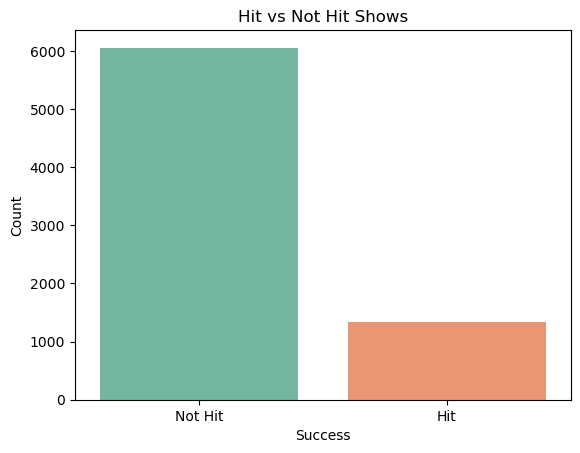

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Hit vs Not Hit
sns.countplot(x='success', data=df, palette='Set2')
plt.xticks([0, 1], ['Not Hit', 'Hit'])
plt.title("Hit vs Not Hit Shows")
plt.xlabel("Success")
plt.ylabel("Count")
plt.show()


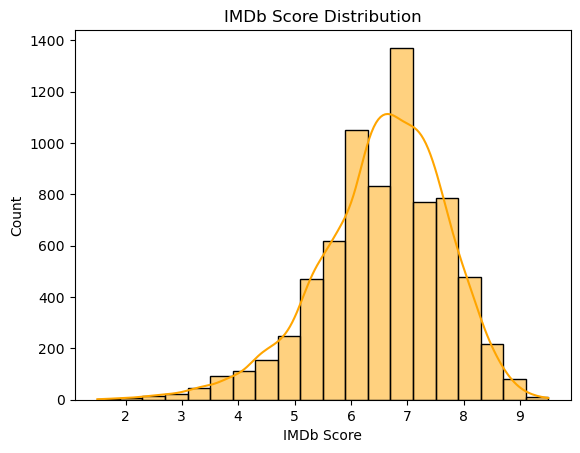

In [89]:
# Plot 2: IMDb Score Distribution
sns.histplot(df['imdb_score'], bins=20, kde=True, color='orange')
plt.title("IMDb Score Distribution")
plt.xlabel("IMDb Score")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_12644\102882427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='success', data=df, palette='coolwarm')


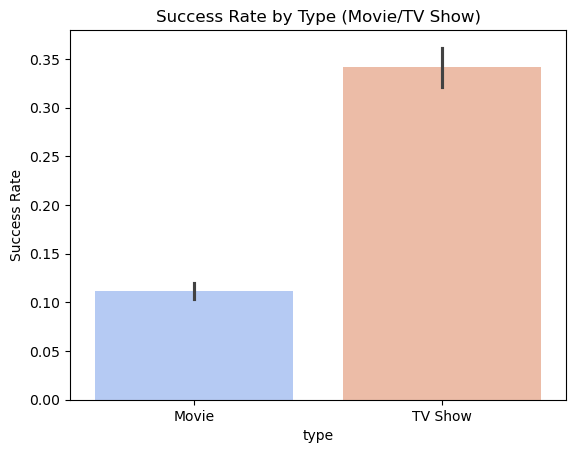

In [91]:
# Plot 3: Success by Type
sns.barplot(x='type', y='success', data=df, palette='coolwarm')
plt.title("Success Rate by Type (Movie/TV Show)")
plt.ylabel("Success Rate")
plt.show()


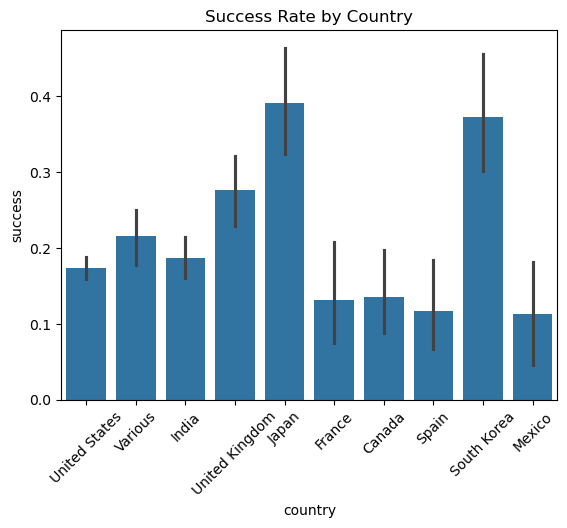

In [93]:
# Plot 4: Success by Country (Top 10)
top_countries = df['country'].value_counts().head(10).index
filtered_df = df[df['country'].isin(top_countries)]
sns.barplot(x='country', y='success', data=filtered_df)
plt.xticks(rotation=45)
plt.title("Success Rate by Country")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_12644\837161472.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='imdb_score', data=df, palette='Set3')


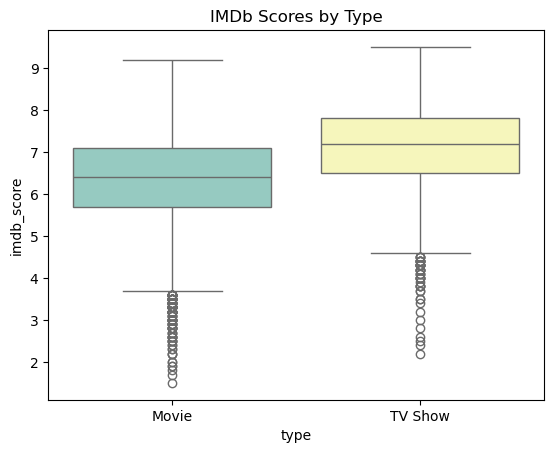

In [94]:
# Plot 5: IMDb Scores by Show Type
sns.boxplot(x='type', y='imdb_score', data=df, palette='Set3')
plt.title("IMDb Scores by Type")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_12644\2130890924.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='success', y='cast_count', data=df, palette='Set1')


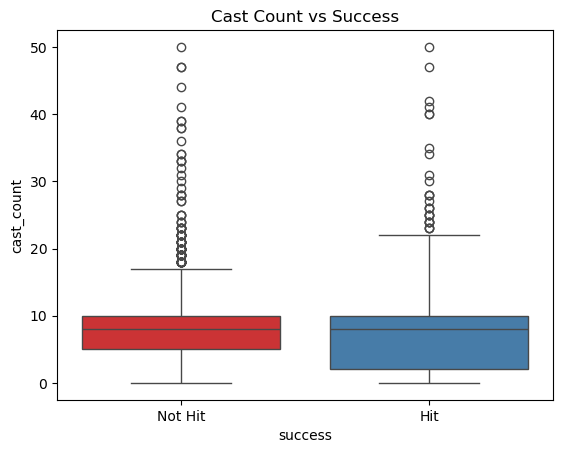

In [96]:
sns.boxplot(x='success', y='cast_count', data=df, palette='Set1')
plt.title("Cast Count vs Success")
plt.xticks([0, 1], ['Not Hit', 'Hit'])
plt.show()


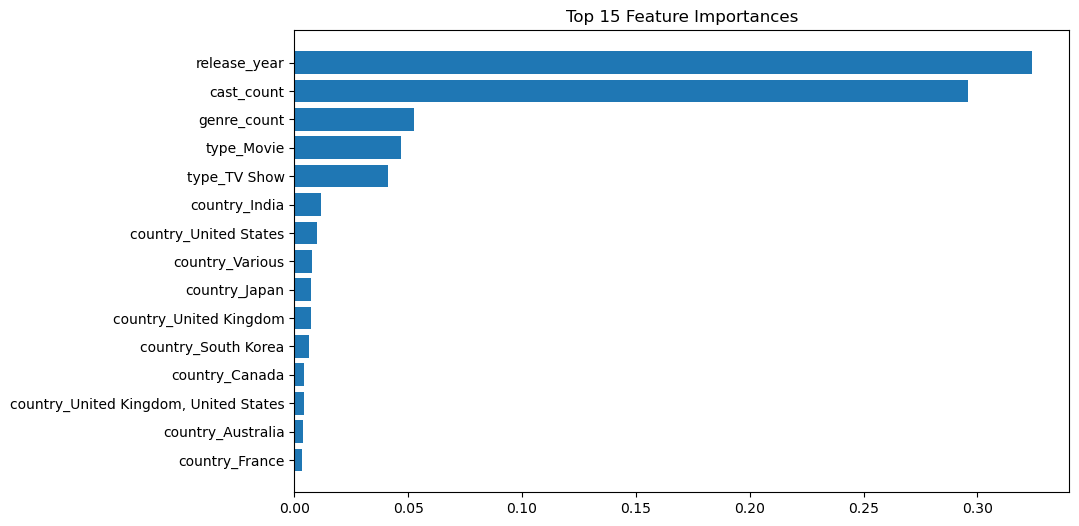

In [59]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[-15:]  # Top 15 features

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feat_names[i] for i in indices])
plt.title("Top 15 Feature Importances")
plt.show()


In [101]:
print(df['success'].value_counts())


success
0    6054
1    1337
Name: count, dtype: int64


In [103]:
# Re-train the model with this setting
from xgboost import XGBClassifier

# Calculate class weights manually:
# scale_pos_weight = (number of negatives / number of positives)
neg, pos = y_train.value_counts()
scale = neg / pos

xgb_model_weighted = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale,
    random_state=42
)

xgb_model_weighted.fit(X_train, y_train)
y_pred_weighted = xgb_model_weighted.predict(X_test)


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:25:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [111]:
# Compute weight = #neg / #pos
neg, pos = y_train.value_counts()
scale = neg / pos
print("Class Imbalance Weight:", scale)

# Train XGBoost with class weight
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale,
    random_state=42
)

xgb_model.fit(X_train, y_train)


Class Imbalance Weight: 4.530402245088868


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:28:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

✅ Accuracy: 0.6923597025016903

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1211
           1       0.32      0.63      0.42       268

    accuracy                           0.69      1479
   macro avg       0.61      0.67      0.61      1479
weighted avg       0.79      0.69      0.72      1479


📊 Confusion Matrix:
 [[856 355]
 [100 168]]


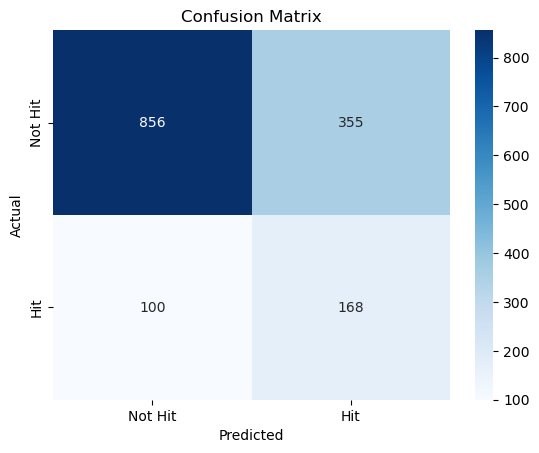

In [113]:
y_pred = xgb_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hit', 'Hit'], yticklabels=['Not Hit', 'Hit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [115]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Retrain
xgb_model.fit(X_train_res, y_train_res)


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:29:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [117]:
# Predict class labels
y_pred = xgb_model.predict(X_test)

# Predict probabilities (for ROC/AUC or threshold tuning)
y_probs = xgb_model.predict_proba(X_test)[:, 1]


✅ Accuracy: 0.5699797160243407

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.52      0.67      1211
           1       0.27      0.79      0.40       268

    accuracy                           0.57      1479
   macro avg       0.59      0.65      0.53      1479
weighted avg       0.80      0.57      0.62      1479

🎯 AUC Score: 0.6919330884799784


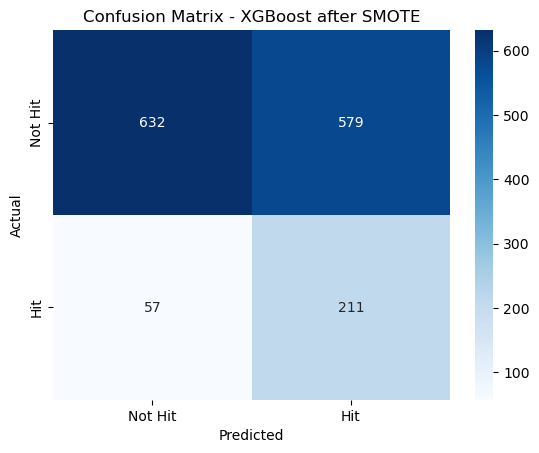

In [119]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Basic Metrics
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))
print("🎯 AUC Score:", roc_auc_score(y_test, y_probs))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hit', 'Hit'], yticklabels=['Not Hit', 'Hit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost after SMOTE")
plt.show()


In [131]:
# 1. Imports
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load & Preprocess
df = pd.read_csv("netflix_titles_with_IMDB.csv")
df.rename(columns={'IMDB_rating': 'imdb_score', 'IMDB_numvotes': 'imdb_votes', 'listed_in': 'genre'}, inplace=True)
df = df[df['imdb_score'].notnull() & df['imdb_score'] > 0]
df['success'] = df['imdb_score'].apply(lambda x: 1 if x > 7.5 else 0)
df['cast_count'] = df['cast'].fillna('Unknown').apply(lambda x: len(str(x).split(',')))
df['genre_count'] = df['genre'].fillna('Unknown').apply(lambda x: len(str(x).split(',')))
df['director_known'] = df['director'].fillna('Unknown').apply(lambda x: 0 if x == 'Unknown' else 1)
df['log_votes'] = np.log1p(df['IMDB_numvotes'].fillna(0))
df['country'] = df['country'].fillna('Various')
df['type'] = df['type'].fillna('Movie')

# 3. Features
cat = df[['type', 'country']]
num = df[['release_year', 'cast_count', 'genre_count', 'director_known', 'log_votes']]
y = df['success']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_encoded = encoder.fit_transform(cat)
cat_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(cat.columns))

X = pd.concat([num.reset_index(drop=True), cat_df.reset_index(drop=True)], axis=1)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 5. SMOTE for balance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 6. Train XGBoost with class weight
neg, pos = y_train.value_counts()
scale = neg / pos
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale, random_state=42)
model.fit(X_train_res, y_train_res)

# 7. Predict with smart threshold
probs = model.predict_proba(X_test)[:, 1]
threshold = 0.6  # better than default 0.5
preds = (probs > threshold).astype(int)

# 8. Evaluate
print("✅ Accuracy:", accuracy_score(y_test, preds))
print("🎯 ROC-AUC:", roc_auc_score(y_test, probs))
print("\n🧾 Classification Report:\n", classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Not Hit', 'Hit'], yticklabels=['Not Hit', 'Hit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


KeyError: 'IMDB_numvotes'

In [133]:
print(df.columns.tolist())


['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'genre', 'description', 'imdb_votes', 'imdb_score', 'success', 'cast_count', 'genre_count', 'director_known']


In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


In [141]:
# Load dataset
df = pd.read_csv("netflix_titles_with_IMDB.csv")

# Rename and handle missing
df['IMDB_rating'] = df['IMDB_rating'].fillna(0)
df['IMDB_numvotes'] = df['IMDB_numvotes'].fillna(0)
df['cast'] = df['cast'].fillna("Unknown")
df['director'] = df['director'].fillna("Unknown")
df['country'] = df['country'].fillna("Various")
df['listed_in'] = df['listed_in'].fillna("Misc")

# Drop rows with invalid IMDb scores (optional)
df = df[df['IMDB_rating'] > 0]

# Define target: success if IMDb > 7.5
df['success'] = df['IMDB_rating'].apply(lambda x: 1 if x > 7.5 else 0)

# Feature engineering
df['cast_count'] = df['cast'].apply(lambda x: len(str(x).split(',')))
df['genre_count'] = df['listed_in'].apply(lambda x: len(str(x).split(',')))
df['director_known'] = df['director'].apply(lambda x: 0 if x == 'Unknown' else 1)
df['log_votes'] = np.log1p(df['IMDB_numvotes'])

# Select features
cat = df[['type', 'country']]
num = df[['release_year', 'cast_count', 'genre_count', 'director_known', 'log_votes']]
y = df['success']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_encoded = encoder.fit_transform(cat)
cat_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(cat.columns))

# Final feature matrix
X = pd.concat([num.reset_index(drop=True), cat_df.reset_index(drop=True)], axis=1)


In [143]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Calculate class weight
neg, pos = y_train.value_counts()
scale = neg / pos


In [145]:
# Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale, random_state=42)
model.fit(X_train_bal, y_train_bal)


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:02:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

✅ Accuracy: 0.7194050033806626
🎯 ROC-AUC: 0.7850025265908279

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1211
           1       0.36      0.69      0.47       268

    accuracy                           0.72      1479
   macro avg       0.64      0.71      0.64      1479
weighted avg       0.81      0.72      0.75      1479



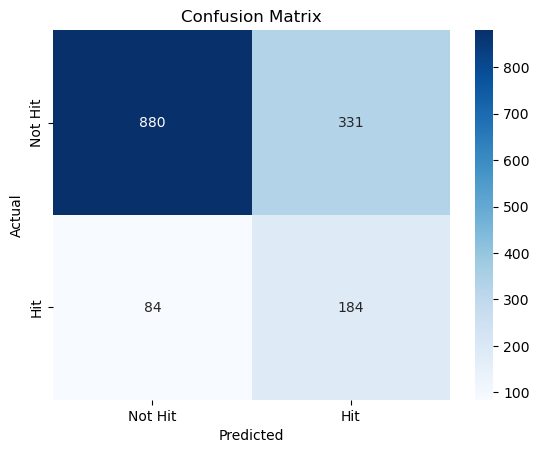

In [147]:
# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Use smarter threshold (default is 0.5; adjust if needed)
threshold = 0.6
y_pred = (y_probs > threshold).astype(int)

# Accuracy and evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("🎯 ROC-AUC:", roc_auc_score(y_test, y_probs))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hit', 'Hit'], yticklabels=['Not Hit', 'Hit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [149]:
# Add new features
df['duration_mins'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['has_known_cast'] = df['cast'].apply(lambda x: 0 if x == 'Unknown' else 1)
df['release_decade'] = (df['release_year'] // 10) * 10


In [153]:
# Updated features
cat = df[['type', 'country', 'release_decade']]
num = df[['cast_count', 'genre_count', 'director_known', 'log_votes', 'duration_mins', 'has_known_cast']]
y = df['success']

# One-hot encode
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_encoded = encoder.fit_transform(cat)
cat_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(cat.columns))

# Final matrix
X = pd.concat([num.reset_index(drop=True), cat_df.reset_index(drop=True)], axis=1)


In [157]:
# Impute/fill missing values in final X
X.fillna(0, inplace=True)


In [159]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

neg, pos = y_train.value_counts()
scale = neg / pos


In [161]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=150,
    max_depth=5,
    learning_rate=0.07,
    subsample=0.8,
    colsample_bytree=0.9,
    scale_pos_weight=scale,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train_bal, y_train_bal)


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:11:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

✅ Accuracy: 0.7119675456389453
🎯 ROC AUC: 0.8001528279330021

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.70      0.80      1211
           1       0.36      0.76      0.49       268

    accuracy                           0.71      1479
   macro avg       0.64      0.73      0.64      1479
weighted avg       0.83      0.71      0.74      1479



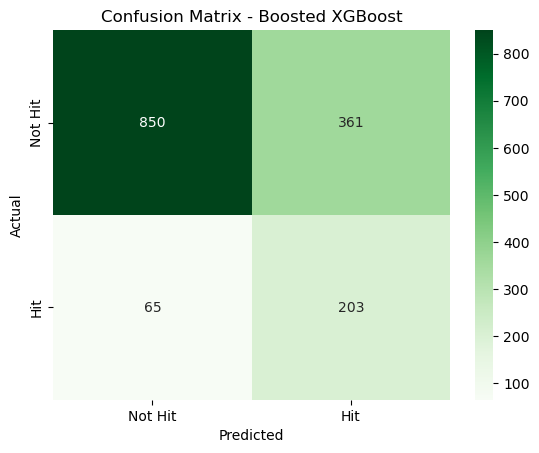

In [163]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Use smarter threshold (ex: 0.6)
threshold = 0.6
y_pred = (y_probs > threshold).astype(int)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("🎯 ROC AUC:", roc_auc_score(y_test, y_probs))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Hit', 'Hit'], yticklabels=['Not Hit', 'Hit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Boosted XGBoost")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_12644\2123460186.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), palette='coolwarm')


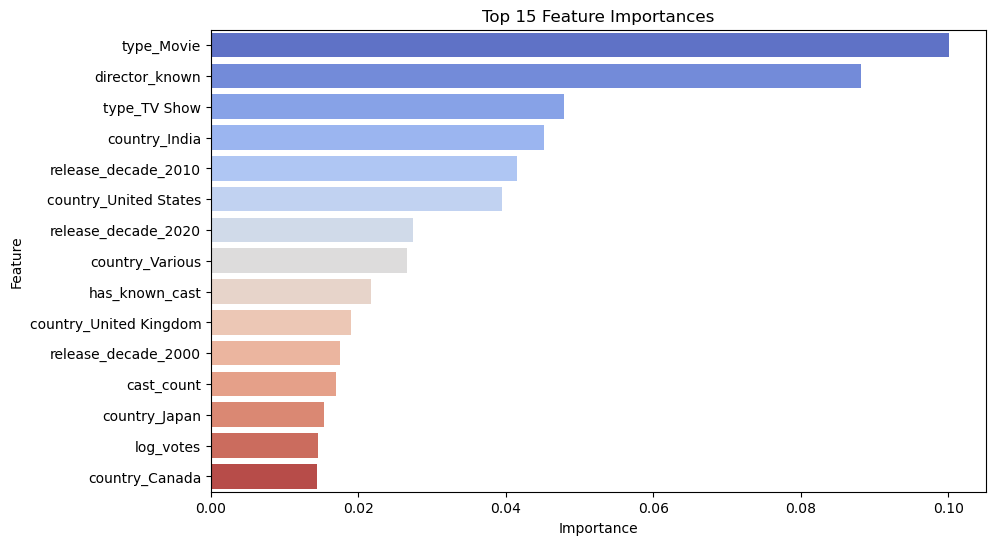

In [165]:
importances = model.feature_importances_
feat_names = X.columns
feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), palette='coolwarm')
plt.title("Top 15 Feature Importances")
plt.show()


In [167]:
pip install shap



   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 8.8 MB/s eta 0:00:00


In [169]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(model, X_test)

# Get SHAP values
shap_values = explainer(X_test)


 99%|===================| 1460/1479 [00:11<00:00]       

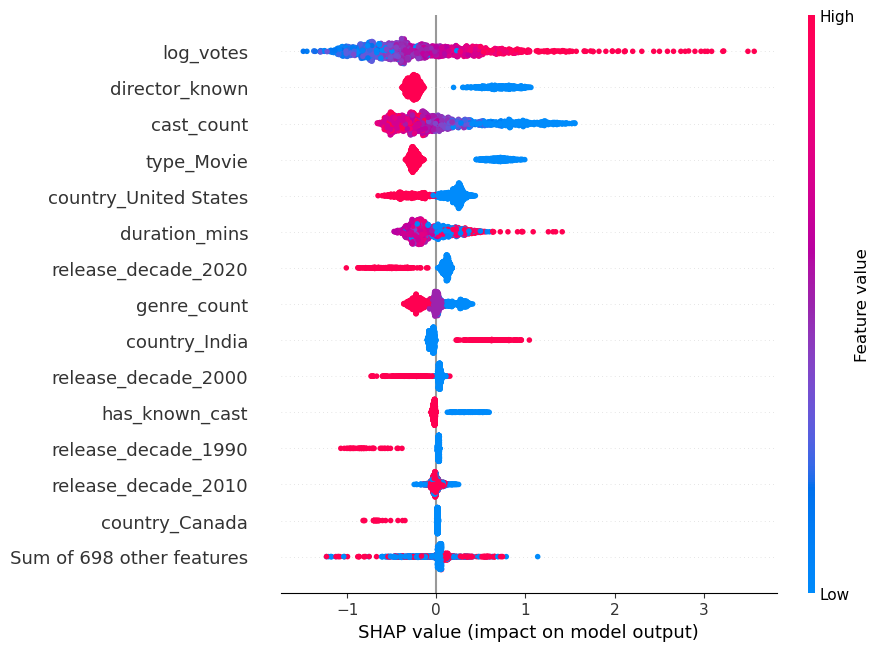

In [171]:
shap.plots.beeswarm(shap_values, max_display=15)


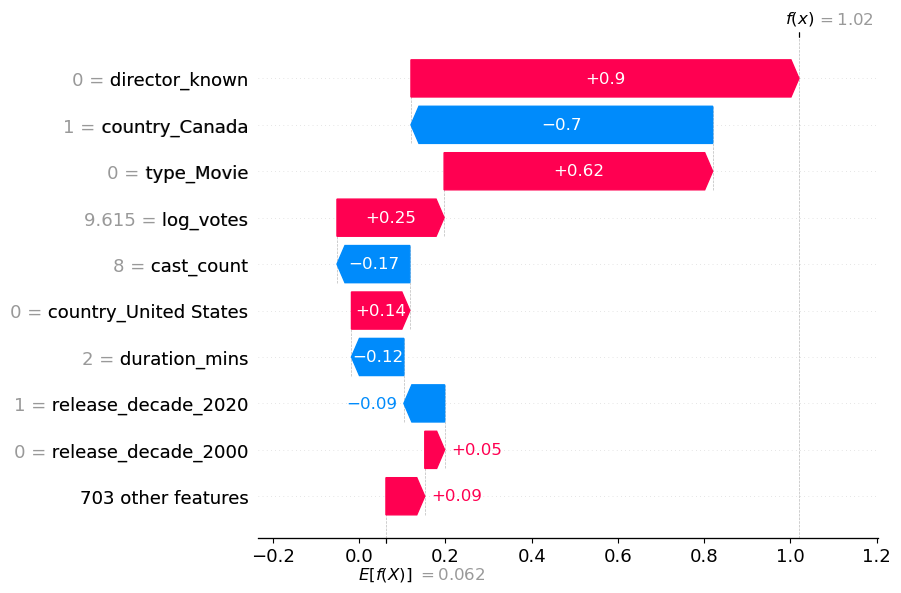

In [173]:
# Choose an index from X_test
index = 5
shap.plots.waterfall(shap_values[index])


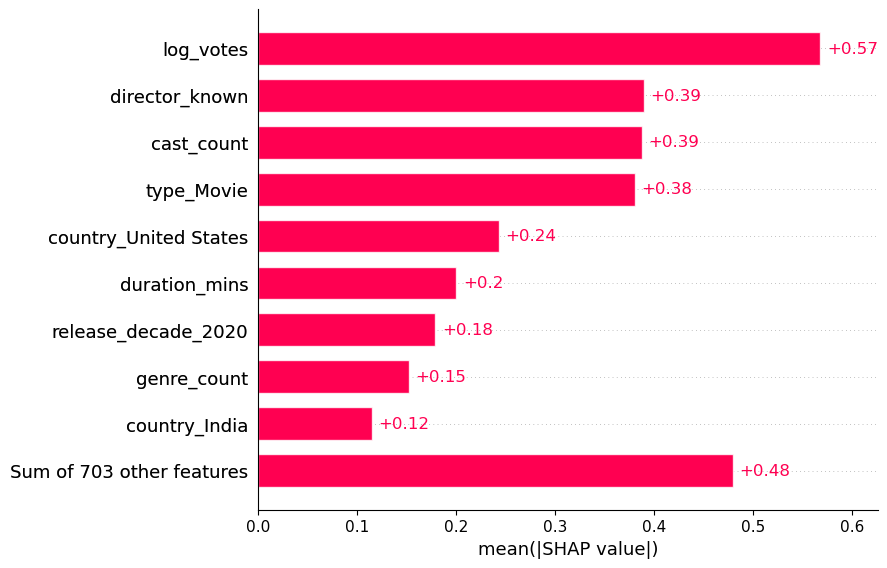

In [175]:
shap.plots.bar(shap_values)


In [177]:
import pickle

# 1. Save the trained XGBoost model
with open("netflix_success_model.pkl", "wb") as f:
    pickle.dump(model, f)

# 2. Save the OneHotEncoder
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

# 3. Save the feature column order (very important for future predictions)
feature_columns = X.columns.tolist()
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)

# 4. Optional: Save test data (for validation / re-evaluation later)
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("✅ All files saved: model, encoder, columns, test data.")


✅ All files saved: model, encoder, columns, test data.


In [179]:
import pickle

# 1. Save trained XGBoost model
with open("netflix_success_model.pkl", "wb") as f:
    pickle.dump(model, f)

# 2. Save trained OneHotEncoder
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

# 3. Save column names used in training (order is important)
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

print("✅ Saved: model, encoder, and feature columns list.")


✅ Saved: model, encoder, and feature columns list.


In [181]:
import pickle
import os

# 1. Save model
with open("netflix_success_model.pkl", "wb") as f:
    pickle.dump(model, f)

# 2. Save encoder
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

# 3. Save feature column list
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

# Confirm files exist
print("\n✅ Saved files in:", os.getcwd())
print("📂 Files in this folder:")
print(os.listdir())



✅ Saved files in: C:\Users\DELL\Desktop\Data Analytics
📂 Files in this folder:
['.ipynb_checkpoints', 'app.ipynb', 'bar.png', 'Bike Sales Dashboard.xlsx', 'BlinkIT Grocery Data.xlsx', 'Calories Burnt Prediction.ipynb', 'calories.csv', 'Car Price Prediction Project.ipynb', 'Car Price Prediction.ipynb', 'CarData.csv', 'CarPrice.csv', 'Credit Card Fraud Detection.ipynb', 'creditcard.csv', 'Crime Prediction.ipynb', 'crime.png', 'crime_classifier_model.pkl', 'crime_dataset_india.csv', 'crime_predictor_model.pkl', 'E-Commerce Project.ipynb', 'encoder.pkl', 'exercise.csv', 'Face Detection.ipynb', 'Fake Job Post Detector.ipynb', 'Fake-Job-Post-Detector', 'feature_columns.pkl', 'Iris.csv', 'label_encoder.pkl', 'loan.csv', 'Machine Learning.ipynb', 'Matplotlib.ipynb', 'mobile_sales.csv', 'Movie Recommendation System.ipynb', 'Movies.csv', 'Movie_Recommendation_System_With_Sentiment.ipynb', 'Netflix Analysis.ipynb', 'Netflix Analysis.sql', 'netflix_success_model.pkl', 'netflix_titles.csv', 'netfl